In [21]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [22]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.optimize as optm

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import collections
import functools

import optics_funs as of
import numerical_funs as nf
import matplotlib_funs as mpf
import LCT_funs as lctf
import general_funs as gef

import new_types as nt
import mutants

import func_funs as ff
import graph_funs as grf

import networkx as nx
import wolfram_funs as wlf

import netgraph as ng
import graph_tool as gt

In [23]:
def make_sparse_matrix(N=10, sparsity=0.5):
    m = np.random.rand(N, N)
    m[m>sparsity] = 1
    m[m<sparsity] = 0
    m = m.astype(int)
    return m

In [159]:
m = make_sparse_matrix(N=10, sparsity=0.8)
m

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [155]:
m = np.array([[0, 1, 0, 1, 0],
               [0, 0, 0, 1, 0],
               [0, 1, 0, 0, 0],
               [0, 0, 1, 1, 0],
               [1, 1, 0, 0, 0]])

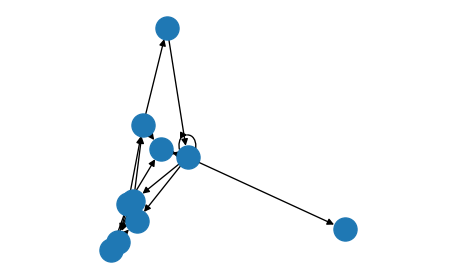

In [160]:
G = nx.DiGraph(m)
# dd = {n:n+1 for n in range(5)}
# nx.relabel_nodes(G, dd, copy=False)
# lay1 = nx.kamada_kawai_layout(G, scale=2)
lay1 = nx.random_layout(G)
# lay2 = nx.spring_layout(G, iterations=9000, threshold=1e-16)
# lay3 = ng.get_fruchterman_reingold_layout(list(G.edges))
lay5 = nx.spectral_layout(G)
grf.draw(G, pos=lay5)

In [161]:
lay4 = grf.spring_electrical_layout(G, layout=lay5, iterations=1000, debug=True)

1000 5.577862591793625e-07


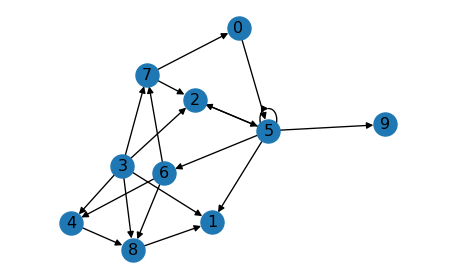

In [162]:
grf.draw(G, pos=lay4, with_labels=True)

In [1941]:
grf.spring_electrical_potential(G, lay4)

1456.3241325022404

In [1934]:
grf.spring_electrical_potential(G, lay4)

1456.3244808495808

In [1935]:
grf.spring_electrical_potential(G, lay4)

1456.3244808495808

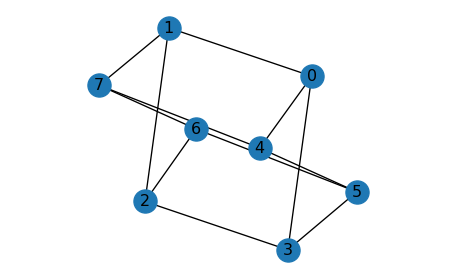

In [86]:
G = nx.cubical_graph()
lay1 = nx.kamada_kawai_layout(G, scale=2)
lay1 = nx.random_layout(G)
lay1_t = lay1.copy()
# lay2 = nx.spring_layout(G, pos=lay1, iterations=9000, threshold=1e-16)

lay4 = grf.spring_electrical_layout(G, layout=lay1, iterations=1000)
grf.draw(G, pos=lay4, with_labels=True)

In [163]:
import graph_tool as gt
import graph_tool.draw
import graph_tool.generation
import graph_tool.stats

g = gt.Graph(directed=True)
g.add_edge_list(np.transpose(nx.adjacency_matrix(G).nonzero()))
gt.stats.remove_parallel_edges(g)

# g = gt.generation.price_network(1000)
pos0 = gt.draw.arf_layout(g)
pos1 = gt.draw.fruchterman_reingold_layout(g, n_iter=1000)
pos2 = gt.draw.sfdp_layout(g)

In [164]:
# vprop_double = g.new_vertex_property("string")            # Double-precision floating point
# v = g.vertex(3)
# vprop_double[v] = 'apple'

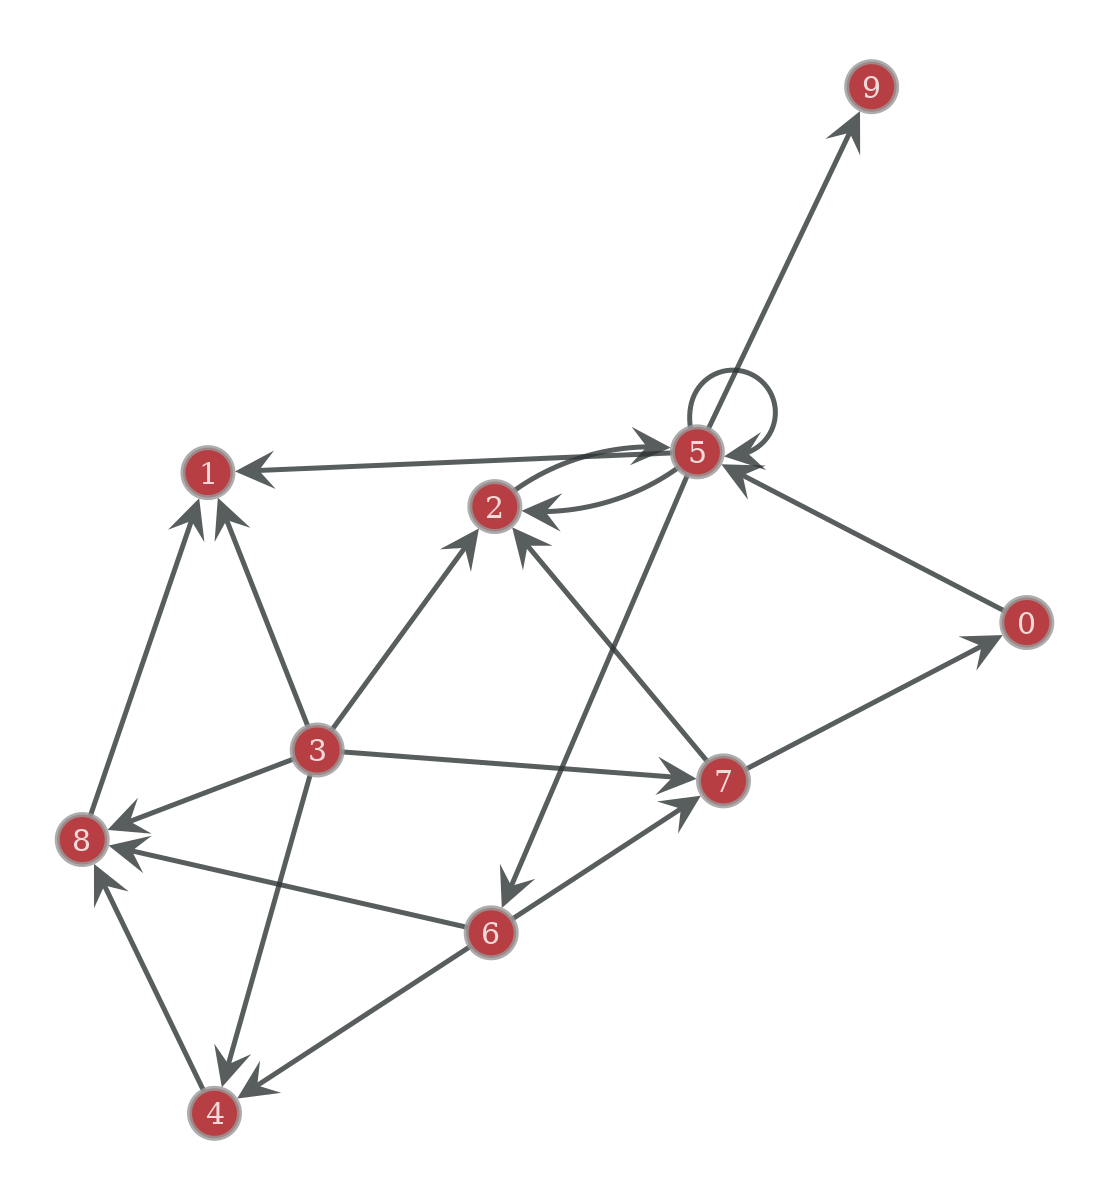

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f259b75c700, at 0x7f259b181b20>

In [171]:
gt.draw.graph_draw(g, pos=pos2, vertex_text=g.vertex_index, bg_color='white', vprops={'size':25})